# Mount Drive

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install BerTopic Package

In [1]:
%%capture
!pip3 install bertopic
!pip3 install bertopic[visualization]

In [2]:
import numpy as np
import sklearn
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from tqdm import tqdm
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic

# BerTopic Toy Example

In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
import numpy as np

import sklearn
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

In [ ]:
# type(docs)
# docs[0]
len(docs)
# docs[10]

18846

In [ ]:
model = BERTopic(verbose=True, calculate_probabilities=True)
topics, probabilities = model.fit_transform(docs)

2021-04-23 03:14:47,178 - BERTopic - Transformed documents to Embeddings


2021-04-23 03:15:02,260 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 03:15:26,967 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

num_doc = len(docs)
# Prepare embeddings
sentence_model = SentenceTransformer("distilbert-base-nli-mean-tokens")
embeddings = sentence_model.encode(docs[:num_doc], show_progress_bar=True)

# Create topic model
model = BERTopic(verbose=True, calculate_probabilities=True, nr_topics=20)
topics, probabilities = model.fit_transform(docs[:num_doc], embeddings)

2021-04-23 03:27:19,672 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 03:27:45,074 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 03:27:56,435 - BERTopic - Reduced number of topics from 143 to 21


In [ ]:
embeddings.shape

(18846, 768)

In [ ]:
model.get_topic_freq()

In [ ]:
model.get_topic(3)

In [ ]:
model.visualize_topics()

In [ ]:
# len(topics)
topics = np.array(topics)
np.unique(topics)
# list(topics)
(topics == 4).sum()

0

In [ ]:
topics = np.array(topics)
idx_valid = topics != -1
# len(idx_valid)
idx_valid.sum()

7196

In [ ]:
score = silhouette_score(embeddings[idx_valid], topics[idx_valid], metric = 'l2')
score

0.10776254

# Load CORD-19 Data

### Load from csv - old

In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
class DataHandler(object):
  '''
  Class that is used to load all the data from the CORD-19 dataset
  '''
  def __init__(self, filename):
    self.filename = filename
  
  def read_metadata(self):
    return pd.read_csv(self.filename, sep=',', error_bad_lines=False)

In [ ]:
metadata_path = "/content/drive/MyDrive/Winter2021/EECS545/project/EECS545_fina_project/metadata.csv"

In [ ]:
data_handler = DataHandler(metadata_path)
df_meta = data_handler.read_metadata()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [ ]:
df_meta.dropna(subset=['title'], inplace=True)
df_meta.dropna(subset=['abstract'], inplace=True)
df_meta = df_meta[df_meta['publish_time'] > '2020-00-00']
df_meta.reset_index(inplace=True, drop=True)
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163223 entries, 0 to 163222
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          163223 non-null  object 
 1   sha               100266 non-null  object 
 2   source_x          163223 non-null  object 
 3   title             163223 non-null  object 
 4   doi               137736 non-null  object 
 5   pmcid             90676 non-null   object 
 6   pubmed_id         110333 non-null  object 
 7   license           163223 non-null  object 
 8   abstract          163223 non-null  object 
 9   publish_time      163223 non-null  object 
 10  authors           162340 non-null  object 
 11  journal           144205 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  19693 non-null   object 
 14  arxiv_id          6270 non-null    object 
 15  pdf_json_files    100266 non-null  object 
 16  pmc_json_files    77

In [ ]:
df_meta.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,f9tg6xsg,44449ad1cca160ce491d7624f8ae1028f3570c45,PMC,Dexmedetomidine improved renal function in pat...,10.1186/s40560-019-0415-z,PMC6939335,31908779,cc-by,BACKGROUND: Dexmedetomidine has been reported ...,2020-01-02,"Nakashima, Tsuyoshi; Miyamoto, Kyohei; Shima, ...",J Intensive Care,NaN,NaN,NaN,document_parses/pdf_json/44449ad1cca160ce491d7...,document_parses/pmc_json/PMC6939335.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN
1,f73c639r,def41c08c3cb1b3752bcff34d3aed7f8486e1c86,PMC,Aortic volume determines global end-diastolic ...,10.1186/s40635-019-0284-8,PMC6940405,31897796,cc-by,BACKGROUND: Global end-diastolic volume (GEDV)...,2020-01-02,"Akohov, Aleksej; Barner, Christoph; Grimmer, S...",Intensive Care Med Exp,NaN,NaN,NaN,document_parses/pdf_json/def41c08c3cb1b3752bcf...,document_parses/pmc_json/PMC6940405.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN
2,1qgpa45q,f5ae3f66face323615df39d838e056ab5fcc98df,PMC,Whole genome sequencing and phylogenetic analy...,10.1186/s12864-019-6400-z,PMC6941262,31898474,cc-by,BACKGROUND: Human metapneumovirus (HMPV) is an...,2020-01-02,"Kamau, Everlyn; Oketch, John W.; de Laurent, Z...",BMC Genomics,NaN,NaN,NaN,document_parses/pdf_json/f5ae3f66face323615df3...,document_parses/pmc_json/PMC6941262.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN
3,g34f5w6b,5be75ae4e7f8c892abd8dc396b9dbd035772c84a,PMC,European intensive care physicians’ experience...,10.1186/s13756-019-0662-8,PMC6941296,31908772,cc-by,BACKGROUND: Antimicrobial resistance (AMR) com...,2020-01-02,"Lepape, Alain; Jean, Astrid; De Waele, Jan; Fr...",Antimicrob Resist Infect Control,NaN,NaN,NaN,document_parses/pdf_json/5be75ae4e7f8c892abd8d...,document_parses/pmc_json/PMC6941296.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN
4,d1pd09zj,1cee4a0d0e823379ec34a462a04561bf4cd736a2,PMC,Synthetic carbohydrate-based vaccines: challen...,10.1186/s12929-019-0591-0,PMC6941340,31900143,cc-by,Glycoconjugate vaccines based on bacterial cap...,2020-01-03,"Mettu, Ravinder; Chen, Chiang-Yun; Wu, Chung-Yi",J Biomed Sci,NaN,NaN,NaN,document_parses/pdf_json/1cee4a0d0e823379ec34a...,document_parses/pmc_json/PMC6941340.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN


In [ ]:
columns_to_keep = [
            'cord_uid',
            'sha',
            'title',
            'abstract',
            'publish_time',
            'authors',
            'pdf_json_files',
            'url'
]
df_meta_filtered = df_meta[columns_to_keep]
df_meta_filtered.head()

,cord_uid,sha,title,abstract,publish_time,authors,pdf_json_files,url
0,f9tg6xsg,44449ad1cca160ce491d7624f8ae1028f3570c45,Dexmedetomidine improved renal function in pat...,BACKGROUND: Dexmedetomidine has been reported ...,2020-01-02,"Nakashima, Tsuyoshi; Miyamoto, Kyohei; Shima, ...",document_parses/pdf_json/44449ad1cca160ce491d7...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...
1,f73c639r,def41c08c3cb1b3752bcff34d3aed7f8486e1c86,Aortic volume determines global end-diastolic ...,BACKGROUND: Global end-diastolic volume (GEDV)...,2020-01-02,"Akohov, Aleksej; Barner, Christoph; Grimmer, S...",document_parses/pdf_json/def41c08c3cb1b3752bcf...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...
2,1qgpa45q,f5ae3f66face323615df39d838e056ab5fcc98df,Whole genome sequencing and phylogenetic analy...,BACKGROUND: Human metapneumovirus (HMPV) is an...,2020-01-02,"Kamau, Everlyn; Oketch, John W.; de Laurent, Z...",document_parses/pdf_json/f5ae3f66face323615df3...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...
3,g34f5w6b,5be75ae4e7f8c892abd8dc396b9dbd035772c84a,European intensive care physicians’ experience...,BACKGROUND: Antimicrobial resistance (AMR) com...,2020-01-02,"Lepape, Alain; Jean, Astrid; De Waele, Jan; Fr...",document_parses/pdf_json/5be75ae4e7f8c892abd8d...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...
4,d1pd09zj,1cee4a0d0e823379ec34a462a04561bf4cd736a2,Synthetic carbohydrate-based vaccines: challen...,Glycoconjugate vaccines based on bacterial cap...,2020-01-03,"Mettu, Ravinder; Chen, Chiang-Yun; Wu, Chung-Yi",document_parses/pdf_json/1cee4a0d0e823379ec34a...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...


In [ ]:
len(df_meta_filtered)

163223

In [ ]:
num_doc = len(df_meta_filtered)
data_title = df_meta_filtered.loc[:num_doc,'title'].tolist()
data_abstract = df_meta_filtered.loc[:num_doc,'abstract'].tolist()
data_merged = []
for i in range(len(data_title)):
  # data_merged.append('Title: ' + data_title[i] + ' Abstract: ' + data_abstract[i])
  data_merged.append(data_title[i] + '. ' + data_abstract[i])
print(len(data_merged))
df_data_merged = pd.DataFrame(data_merged, columns=['title_abstract'])
df_data_merged.drop_duplicates(subset='title_abstract')
df_data_merged.reset_index(drop=True, inplace=True)

163223


In [ ]:
len(data_merged)
data_merged[0]

'Dexmedetomidine improved renal function in patients with severe sepsis: an exploratory analysis of a randomized controlled trial. BACKGROUND: Dexmedetomidine has been reported to improve organ dysfunction in critically ill patients. In a recent randomized controlled trial (Dexmedetomidine for Sepsis in Intensive Care Unit (ICU) Randomized Evolution [DESIRE]), we demonstrated that dexmedetomidine was associated with reduced mortality risk among patients with severe sepsis. We performed this exploratory sub-analysis to examine the mechanism underlying improved survival in patients sedated with dexmedetomidine. METHODS: The DESIRE trial compared a sedation strategy with and without dexmedetomidine among 201 mechanically ventilated adult patients with sepsis across eight ICUs in Japan. In the present study, we included 104 patients with Acute Physiology and Chronic Health Evaluation II (APACHE II) scores of ≥ 23 (54 in the dexmedetomidine [DEX] group and 50 in the non-dexmedetomidine [non

### Save as csv - not work

In [ ]:
import csv

with open("all_data.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(data_merged)

In [ ]:
with open('all_data.csv', 'r') as f:
  i = 0
  for item in f:
    i += 1
    print(item)
    if i > 10:
      break

In [ ]:
print("data length: ", len(lines))
print(lines[0])
data_merged = lines

163223
Dexmedetomidine improved renal function in patients with severe sepsis: an exploratory analysis of a randomized controlled trial. BACKGROUND: Dexmedetomidine has been reported to improve organ dysfunction in critically ill patients. In a recent randomized controlled trial (Dexmedetomidine for Sepsis in Intensive Care Unit (ICU) Randomized Evolution [DESIRE]), we demonstrated that dexmedetomidine was associated with reduced mortality risk among patients with severe sepsis. We performed this exploratory sub-analysis to examine the mechanism underlying improved survival in patients sedated with dexmedetomidine. METHODS: The DESIRE trial compared a sedation strategy with and without dexmedetomidine among 201 mechanically ventilated adult patients with sepsis across eight ICUs in Japan. In the present study, we included 104 patients with Acute Physiology and Chronic Health Evaluation II (APACHE II) scores of ≥ 23 (54 in the dexmedetomidine [DEX] group and 50 in the non-dexmedetomidin

### Save as text

In [ ]:
from tqdm import tqdm
import numpy as np
with open('all_data.txt', 'w') as f:
  for item in tqdm(data_merged):
    f.write("%s\n" % item)

100%|██████████| 163223/163223 [00:06<00:00, 25486.95it/s]


In [ ]:
with open('all_data.txt', 'r') as f:
  i = 0
  for item in f:
    i += 1
    print(item)
    if i > 10:
      break

### Load from txt

In [3]:
# %cd /content/drive/MyDrive/Winter2021/EECS545/project/EECS545_fina_project/
%cd /content/drive/MyDrive/EECS545/

/content/drive/MyDrive/EECS545


In [4]:
!pwd

/content/drive/MyDrive/EECS545


In [5]:
with open('all_data.txt', 'r') as f:
  data_merged = f.readlines()

# Data Preprocessing - not used

In [ ]:
class Preprocessor(object):
  def __init__(self, stopwords, stemmer):
    self.stopwords = stopwords
    self.stemmer = stemmer
  
  # tokenization and stemming
  def tokenization_and_stemming(self, text):
    tokens = []

    # exclude stop words and tokenize the document, generate a list of string 
    for word in nltk.word_tokenize(text):
        if word.lower() not in stopwords:
            tokens.append(word.lower())

    filtered_tokens = []
    
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if token.isalpha():
            filtered_tokens.append(token)
            
    # stemming
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

  def preprocess(self, text):
        """
        Main function to preprocess the text
        """
        lang = self.detect_language(text)
            
        if lang in ["en", "fr", "es", "it", "de", "pt"]:
            nlp = self.nlp_list[lang]
        else:
            nlp = self.nlp_list[self.default_language]
            
        # Delete some punctuation before preprocessing BUT not all of it because some can be involved in n-grams (e.g. "-")
        text=re.sub(r'[!"#$%&\'()*+,./:;<=>?@\[\\\]^_`{|}~]',r' ',text) 
        
        # Apply spacy to the text
        doc = nlp(text)
        # Lemmatization, remotion of noise (stopwords, digit, puntuaction and singol characters)
        tokens = [
            token.lemma_ for token in doc if
            token.lemma_ != '-PRON-'
            and not token.is_punct
            and not token.is_digit
            and not token.like_num
            and not token.like_url
            and not token.like_email
            and len(token.lemma_) >= self.min_token_len and len(token.text) >= self.min_token_len
            and token.lemma_.lower() not in self.stop_list_all and token.text.lower() not in self.stop_list_all
        ]
        
        # Recreation of the text
        text = " ".join(tokens)

        # Remove accents, normalize to ascii
        if self.force_ascii:
            text = normalize('NFD', text).encode('ascii', 'ignore').decode('UTF-8')
        
        if self.force_deaccent:
            text = deaccent(text)
    
        # Remove double spaces
        text=re.sub(r'\s+',r' ',text)
        
        # Set as lowercase
        text = text.lower().strip()

In [ ]:
# Use nltk's English stopwords.
stopwords = nltk.corpus.stopwords.words('english') #stopwords.append("n't")
stopwords.append("'s")
stopwords.append("'m")
stopwords.append("br") #html <br>
stopwords.append("COVID")

print ("We use " + str(len(stopwords)) + " stop-words from nltk library.")
print (stopwords[:10])

stemmer = SnowballStemmer("english")
preprocessor = Preprocessor(stopwords, stemmer)
tokens = preprocessor.tokenization_and_stemming(data_merged[0])
print(tokens)

We use 183 stop-words from nltk library.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['dexmedetomidin', 'improv', 'renal', 'function', 'patient', 'sever', 'sepsi', 'exploratori', 'analysi', 'random', 'control', 'trial', 'background', 'dexmedetomidin', 'report', 'improv', 'organ', 'dysfunct', 'critic', 'ill', 'patient', 'recent', 'random', 'control', 'trial', 'dexmedetomidin', 'sepsi', 'intens', 'care', 'unit', 'icu', 'random', 'evolut', 'desir', 'demonstr', 'dexmedetomidin', 'associ', 'reduc', 'mortal', 'risk', 'among', 'patient', 'sever', 'sepsi', 'perform', 'exploratori', 'examin', 'mechan', 'under', 'improv', 'surviv', 'patient', 'sedat', 'dexmedetomidin', 'method', 'desir', 'trial', 'compar', 'sedat', 'strategi', 'without', 'dexmedetomidin', 'among', 'mechan', 'ventil', 'adult', 'patient', 'sepsi', 'across', 'eight', 'icus', 'japan', 'present', 'studi', 'includ', 'patient', 'acut', 'physiolog', 'chronic', 'health', 'evalu', 'ii', 'apach', 'ii', 's

# Bert on all_data

In [ ]:
print(type(data_merged), len(data_merged), '\n', data_merged[10])

<class 'list'> 163223 
 Clinical characteristics of patients with pneumonia caused by Klebsiella pneumoniae in Taiwan and prevalence of antimicrobial-resistant and hypervirulent strains: a retrospective study. BACKGROUND: We aimed to compare the clinical characteristics of patients with community-acquired pneumonia (CAP), healthcare-associated pneumonia (HCAP), and hospital-acquired pneumonia (HAP) caused by Klebsiella pneumoniae and analyze the antimicrobial resistance and proportion of hypervirluent strains of the microbial isolates. METHODS: We conducted a retrospective study on patients with pneumonia caused by K. pneumoniae at the Taipei Veterans General Hospital in Taiwan between January 2014 and December 2016. To analyze the clinical characteristics of these patients, data was extracted from their medical records. K. pneumoniae strains were subjected to antimicrobial susceptibility testing, capsular genotyping and detection of the rmpA and rmpA2 genes to identify hypervirulent s

In [ ]:
model = BERTopic(verbose=True, calculate_probabilities=True)
topics, probabilities = model.fit_transform(data_merged)

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from tqdm import tqdm

sample_per_doc = 1000
# Prepare embeddings
sentence_model = SentenceTransformer("distilbert-base-nli-mean-tokens", device="cuda")
embeddings = sentence_model.encode(data_merged[::sample_per_doc], show_progress_bar=True)

# Create topic model
model = BERTopic(verbose=True, calculate_probabilities=True, nr_topics=7)
topics, probabilities = model.fit_transform(data_merged[::sample_per_doc], embeddings)

In [ ]:
major_topic = model.get_topic_freq()["Topic"][1] #.head()
model.get_topic_freq()

,Topic,Count
0,-1,96
1,2,26
2,1,23
3,0,19


In [ ]:
model.get_topic(major_topic)

In [ ]:
model.visualize_topics()

In [ ]:
model.visualize_distribution(probabilities[0])

In [ ]:
embeddings.shape
np.unique(topics)

array([-1,  0,  1,  2])

In [ ]:
topics = np.array(topics)
idx_valid = (topics != -1)
# len(idx_valid)
idx_valid.shape
np.unique(topics[idx_valid])

In [ ]:
score = silhouette_score(embeddings[idx_valid], topics[idx_valid], metric = 'l2')
score

0.022921918

In [ ]:
def silhouette_on_k_cluster(num_cluster, sample_per_doc=16, verbose=False):
  # extract topic
  # print("num_cluster: ", num_cluster)
  # Prepare embeddings
  sentence_model = SentenceTransformer("distilbert-base-nli-mean-tokens", device="cuda")
  embeddings = sentence_model.encode(data_merged[::sample_per_doc], show_progress_bar=verbose)

  # Create topic model
  model = BERTopic(verbose=verbose, calculate_probabilities=True, nr_topics=num_cluster)
  topics, probabilities = model.fit_transform(data_merged[::sample_per_doc], embeddings)

  topics = np.array(topics)
  idx_valid = (topics != -1)
  score = silhouette_score(embeddings[idx_valid], topics[idx_valid], metric = 'l2')

  try:
    major_topic = model.get_topic_freq()["Topic"][1]
  except:
    major_topic = []

  return score, model.get_topic(major_topic), model






  0%|          | 0/49 [00:00<?, ?it/s]

2021-04-23 19:49:16,555 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 19:49:23,565 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 19:49:30,916 - BERTopic - Reduced number of topics from 109 to 3





  2%|▏         | 1/49 [01:12<58:03, 72.57s/it]

2021-04-23 19:50:29,877 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 19:50:37,559 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 19:50:45,451 - BERTopic - Reduced number of topics from 120 to 4





  4%|▍         | 2/49 [02:27<57:21, 73.22s/it]

2021-04-23 19:51:45,315 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 19:51:46,838 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 19:51:53,652 - BERTopic - Reduced number of topics from 7 to 5





  6%|▌         | 3/49 [03:39<55:58, 73.01s/it]

2021-04-23 19:52:57,341 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 19:53:05,576 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 19:53:13,543 - BERTopic - Reduced number of topics from 125 to 6





  8%|▊         | 4/49 [04:55<55:21, 73.80s/it]

2021-04-23 19:54:13,603 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 19:54:20,635 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 19:54:28,594 - BERTopic - Reduced number of topics from 119 to 7





 10%|█         | 5/49 [06:10<54:22, 74.14s/it]

2021-04-23 19:55:27,590 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 19:55:36,031 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 19:55:44,016 - BERTopic - Reduced number of topics from 132 to 8





 12%|█▏        | 6/49 [07:26<53:29, 74.64s/it]

2021-04-23 19:56:43,722 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 19:56:51,614 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 19:56:59,262 - BERTopic - Reduced number of topics from 129 to 9





 14%|█▍        | 7/49 [08:41<52:20, 74.78s/it]

2021-04-23 19:57:58,121 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 19:57:59,508 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 19:58:06,115 - BERTopic - Since 9 were found, they could not be reduced to 9





 16%|█▋        | 8/49 [09:52<50:23, 73.73s/it]

2021-04-23 19:59:09,706 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 19:59:16,751 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 19:59:24,749 - BERTopic - Reduced number of topics from 117 to 11





 18%|█▊        | 9/49 [11:06<49:13, 73.83s/it]

2021-04-23 20:00:23,868 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:00:29,483 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:00:37,022 - BERTopic - Reduced number of topics from 93 to 12





 20%|██        | 10/49 [12:19<47:43, 73.43s/it]

2021-04-23 20:01:36,811 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:01:44,154 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:01:52,282 - BERTopic - Reduced number of topics from 120 to 13





 22%|██▏       | 11/49 [13:34<46:49, 73.93s/it]

2021-04-23 20:02:52,069 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:03:01,214 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:03:09,306 - BERTopic - Reduced number of topics from 131 to 14





 24%|██▍       | 12/49 [14:51<46:14, 75.00s/it]

2021-04-23 20:04:09,532 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:04:18,803 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:04:26,775 - BERTopic - Reduced number of topics from 127 to 15





 27%|██▋       | 13/49 [16:09<45:28, 75.80s/it]

2021-04-23 20:05:27,625 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:05:34,894 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:05:42,889 - BERTopic - Reduced number of topics from 113 to 16





 29%|██▊       | 14/49 [17:25<44:10, 75.74s/it]

2021-04-23 20:06:43,917 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:06:45,529 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:06:52,701 - BERTopic - Since 9 were found, they could not be reduced to 16





 31%|███       | 15/49 [18:39<42:43, 75.41s/it]

2021-04-23 20:07:57,407 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:08:05,019 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:08:12,865 - BERTopic - Reduced number of topics from 123 to 18





 33%|███▎      | 16/49 [19:55<41:34, 75.59s/it]

2021-04-23 20:09:12,831 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:09:20,951 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:09:28,592 - BERTopic - Reduced number of topics from 123 to 19





 35%|███▍      | 17/49 [21:10<40:16, 75.51s/it]

2021-04-23 20:10:28,041 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:10:35,501 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:10:43,106 - BERTopic - Reduced number of topics from 124 to 20





 37%|███▋      | 18/49 [22:25<38:46, 75.06s/it]

2021-04-23 20:11:42,288 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:11:49,641 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:11:57,093 - BERTopic - Reduced number of topics from 118 to 21





 39%|███▉      | 19/49 [23:39<37:22, 74.75s/it]

2021-04-23 20:12:55,934 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:13:03,389 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:13:10,885 - BERTopic - Reduced number of topics from 132 to 22





 41%|████      | 20/49 [24:52<35:58, 74.42s/it]

2021-04-23 20:14:09,256 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:14:15,701 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:14:23,078 - BERTopic - Reduced number of topics from 114 to 23





 43%|████▎     | 21/49 [26:05<34:30, 73.94s/it]

2021-04-23 20:15:21,858 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:15:28,708 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:15:36,154 - BERTopic - Reduced number of topics from 111 to 24





 45%|████▍     | 22/49 [27:18<33:07, 73.60s/it]

2021-04-23 20:16:35,721 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:16:43,234 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:16:50,793 - BERTopic - Reduced number of topics from 121 to 25





 47%|████▋     | 23/49 [28:32<31:59, 73.83s/it]

2021-04-23 20:17:50,347 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:17:57,268 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:18:04,808 - BERTopic - Reduced number of topics from 122 to 26





 49%|████▉     | 24/49 [29:46<30:47, 73.92s/it]

2021-04-23 20:19:03,592 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:19:11,307 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:19:18,914 - BERTopic - Reduced number of topics from 118 to 27





 51%|█████     | 25/49 [31:01<29:38, 74.11s/it]

2021-04-23 20:20:18,322 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:20:19,778 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:20:26,500 - BERTopic - Since 10 were found, they could not be reduced to 27





 53%|█████▎    | 26/49 [32:12<28:06, 73.32s/it]

2021-04-23 20:21:30,271 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:21:36,918 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:21:44,515 - BERTopic - Reduced number of topics from 114 to 29





 55%|█████▌    | 27/49 [33:26<26:56, 73.49s/it]

2021-04-23 20:22:44,093 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:22:52,408 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:23:00,059 - BERTopic - Reduced number of topics from 128 to 30





 57%|█████▋    | 28/49 [34:42<25:58, 74.20s/it]

2021-04-23 20:23:59,061 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:24:00,483 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:24:07,070 - BERTopic - Since 8 were found, they could not be reduced to 30





 59%|█████▉    | 29/49 [35:53<24:23, 73.19s/it]

2021-04-23 20:25:10,509 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:25:11,930 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:25:18,521 - BERTopic - Since 8 were found, they could not be reduced to 31





 61%|██████    | 30/49 [37:04<23:00, 72.64s/it]

2021-04-23 20:26:21,391 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:26:29,054 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:26:36,593 - BERTopic - Reduced number of topics from 116 to 33





 63%|██████▎   | 31/49 [38:19<21:57, 73.18s/it]

2021-04-23 20:27:36,166 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:27:43,350 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:27:50,853 - BERTopic - Reduced number of topics from 113 to 34





 65%|██████▌   | 32/49 [39:33<20:47, 73.38s/it]

2021-04-23 20:28:50,469 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:28:58,281 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:29:05,868 - BERTopic - Reduced number of topics from 128 to 35





 67%|██████▋   | 33/49 [40:47<19:40, 73.80s/it]

2021-04-23 20:30:04,624 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:30:10,626 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:30:18,022 - BERTopic - Reduced number of topics from 105 to 36





 69%|██████▉   | 34/49 [42:00<18:23, 73.60s/it]

2021-04-23 20:31:17,634 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:31:24,797 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:31:32,337 - BERTopic - Reduced number of topics from 121 to 37





 71%|███████▏  | 35/49 [43:14<17:09, 73.54s/it]

2021-04-23 20:32:31,084 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:32:38,452 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:32:46,031 - BERTopic - Reduced number of topics from 122 to 38





 73%|███████▎  | 36/49 [44:28<15:57, 73.64s/it]

2021-04-23 20:33:45,078 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:33:53,593 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:34:01,067 - BERTopic - Reduced number of topics from 127 to 39





 76%|███████▌  | 37/49 [45:42<14:47, 73.96s/it]

2021-04-23 20:35:00,131 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:35:07,180 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:35:14,648 - BERTopic - Reduced number of topics from 113 to 40





 78%|███████▊  | 38/49 [46:56<13:33, 73.95s/it]

2021-04-23 20:36:14,014 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:36:21,238 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:36:29,230 - BERTopic - Reduced number of topics from 112 to 41





 80%|███████▉  | 39/49 [48:12<12:23, 74.32s/it]

2021-04-23 20:37:29,563 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:37:36,194 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:37:43,806 - BERTopic - Reduced number of topics from 118 to 42





 82%|████████▏ | 40/49 [49:25<11:07, 74.16s/it]

2021-04-23 20:38:45,036 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:38:54,227 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:39:02,517 - BERTopic - Reduced number of topics from 131 to 43





 84%|████████▎ | 41/49 [50:44<10:05, 75.64s/it]

2021-04-23 20:40:04,364 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:40:12,634 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:40:20,769 - BERTopic - Reduced number of topics from 118 to 44





 86%|████████▌ | 42/49 [52:03<08:56, 76.62s/it]

2021-04-23 20:41:23,082 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:41:24,823 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:41:32,235 - BERTopic - Since 9 were found, they could not be reduced to 44





 88%|████████▊ | 43/49 [53:19<07:38, 76.33s/it]

2021-04-23 20:42:39,684 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:42:49,156 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:42:57,664 - BERTopic - Reduced number of topics from 122 to 46





 90%|████████▉ | 44/49 [54:40<06:28, 77.78s/it]

2021-04-23 20:44:00,586 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:44:06,806 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:44:14,925 - BERTopic - Reduced number of topics from 102 to 47





 92%|█████████▏| 45/49 [55:58<05:11, 77.76s/it]

2021-04-23 20:45:17,758 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:45:25,577 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:45:34,156 - BERTopic - Reduced number of topics from 113 to 48





 94%|█████████▍| 46/49 [57:17<03:54, 78.06s/it]

2021-04-23 20:46:37,364 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:46:46,067 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:46:54,495 - BERTopic - Reduced number of topics from 119 to 49





 96%|█████████▌| 47/49 [58:37<02:37, 78.84s/it]

2021-04-23 20:47:57,613 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:48:07,065 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:48:15,961 - BERTopic - Reduced number of topics from 130 to 50





 98%|█████████▊| 48/49 [59:58<01:19, 79.45s/it]

2021-04-23 20:49:19,353 - BERTopic - Reduced dimensionality with UMAP
2021-04-23 20:49:27,101 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-23 20:49:35,376 - BERTopic - Reduced number of topics from 112 to 51





100%|██████████| 49/49 [1:01:18<00:00, 75.07s/it]





100%|██████████| 49/49 [00:00<00:00, 10223.90it/s]


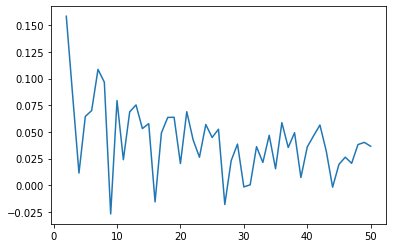

In [ ]:
test_k_list = list(range(2,51))
score_list = []
major_topic_list = []
for k in tqdm(test_k_list):
  score, major_topic_info, model = silhouette_on_k_cluster(num_cluster=k, verbose=True)
  score_list.append(score)
  major_topic_list.append(major_topic_info)
  model.save("models/" + str(k) + ".pth")



score_numpy = np.array(score_list)
np.save("score.npy", score_numpy)

with open('major_topic.txt', 'w') as f:
  for item in tqdm(major_topic_list):
    f.write("%s\n" % item)

import matplotlib.pyplot as plt
plt.plot(test_k_list, score_list)

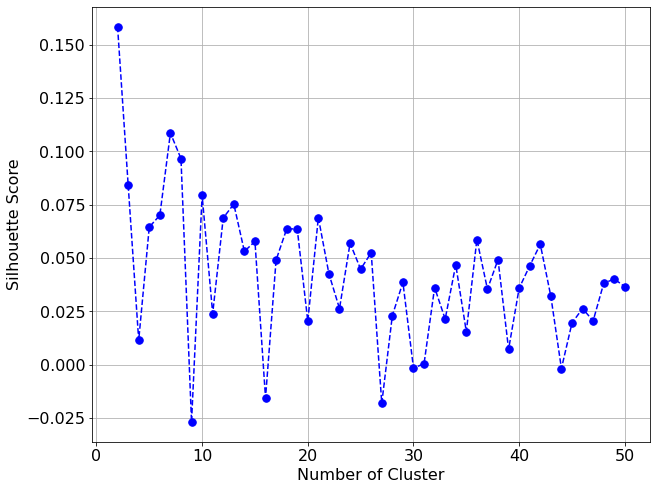

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['font.size'] = 16
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.plot(test_k_list, score_list, 'b--', marker='.', markersize=15)
plt.xlabel("Number of Cluster")
plt.ylabel("Silhouette Score")
plt.grid()

In [ ]:
idx_max = np.argmax(score_list[1:])
idx_max = test_k_list[idx_max+1]
print("max index：", idx_max)
print("max score: ", score_list[idx_max-2])

max index： 7
max score:  0.1085882


In [ ]:
score_list = np.load("score.npy")
score_list.shape

(49,)

In [ ]:
with open('major_topic.txt', 'r') as f:
  major_topic_loaded = f.readlines()
major_topic_loaded

[]

In [ ]:
!pwd

/content/drive/My Drive/EECS545


In [ ]:
model = BERTopic.load("models/45.pth")

In [ ]:
model.visualize_topics()

In [ ]:
model.visualize_distribution()

TypeError: ignored

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from tqdm import tqdm

sample_per_doc = 16
# Prepare embeddings
sentence_model = SentenceTransformer("distilbert-base-nli-mean-tokens", device="cuda")
embeddings = sentence_model.encode(data_merged[::sample_per_doc], show_progress_bar=True)

# Create topic model
model = BERTopic(verbose=True, calculate_probabilities=True, nr_topics=30)
topics, probabilities = model.fit_transform(data_merged[::sample_per_doc], embeddings)

2021-04-25 19:25:49,948 - BERTopic - Reduced dimensionality with UMAP
2021-04-25 19:25:56,974 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-04-25 19:26:04,119 - BERTopic - Reduced number of topics from 114 to 31


In [ ]:
model.get_topic_freq()
type(probabilities)
probabilities.shape

(10202, 113)

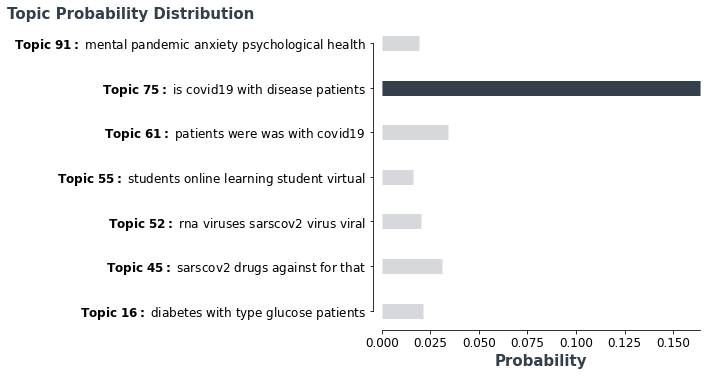

In [ ]:
model.visualize_distribution(probabilities[1] )

In [ ]:
model.visualize_topics()

# Extract embedding

In [ ]:
from sentence_transformers import SentenceTransformer
import pickle

model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.', 
    'The quick brown fox jumps over the lazy dog.']


embeddings = model.encode(sentences)

In [ ]:
embeddings.shape
embeddings

array([[-0.21486185,  0.3957228 ,  0.46908706, ..., -0.2311899 ,
        -0.49579126,  0.42366362],
       [-0.44001693, -0.28488475,  0.23363848, ...,  0.11956115,
        -0.1653026 , -0.08625139],
       [-0.2950478 , -0.24928868, -0.02407048, ...,  0.11944623,
         0.00626617,  1.0400685 ]], dtype=float32)

# Test silhouette_score

In [ ]:
import sklearn
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np


In [ ]:
tfidf_matrix = np.random.rand(22,1000)
k = 10
km = KMeans(n_clusters = k).fit(tfidf_matrix)
# kmeans_model_list_2.append(km)
labels = km.labels_
silhouette_score(tfidf_matrix, labels, metric = 'euclidean')
# print(labels)
# silhouette_score

0.011409172033326113

# TSDAE

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
from sentence_transformers import SentenceTransformer, LoggingHandler
from sentence_transformers import models, util, datasets, evaluation, losses
from torch.utils.data import DataLoader

# Define your sentence transformer model using CLS pooling
model_name = 'bert-base-uncased'
word_embedding_model = models.Transformer(model_name)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension(), pooling_mode_mean_tokens=False, pooling_mode_cls_token=True, pooling_mode_max_tokens=False)
model = SentenceTransformer(modules=[word_embedding_model, pooling_model])

# Define a list with sentences (1k - 100k sentences)
# train_sentences = ["Your set of sentences",
#                    "Model will automatically add the noise", 
#                    "And re-construct it",
#                    "You should provide at least 1k sentences"]
# train_sentences = data_merged[::1600]
train_sentences = data_merged[:10000]

# Create the special denoising dataset that adds noise on-the-fly
train_dataset = datasets.DenoisingAutoEncoderDataset(train_sentences)

# DataLoader to batch your data
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Use the denoising auto-encoder loss
train_loss = losses.DenoisingAutoEncoderLoss(model, decoder_name_or_path=model_name, tie_encoder_decoder=True)

# Call the fit method
model.fit(
    train_objectives=[(train_dataloader, train_loss)],
    epochs=2,
    weight_decay=0,
    scheduler='constantlr',
    optimizer_params={'lr': 3e-5},
    show_progress_bar=True
)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertLMHeadModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertLMHeadModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertLMHeadModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertLMHeadModel were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['bert.encoder.layer.0.crossattention.self.query.weight', 'bert.encoder.layer.0.crossattention.self.query.bias', 'bert.encoder.layer.0.crossattention.self.key.weight', 'bert.encoder.layer.0.crossattention.self.key.bias', 'bert.encoder.layer

In [9]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from tqdm import tqdm

sample_per_doc = 16
# Prepare embeddings
# sentence_model = SentenceTransformer("distilbert-base-nli-mean-tokens", device="cuda")
embeddings = model.encode(data_merged[::sample_per_doc], show_progress_bar=True)

# Create topic model
model = BERTopic(verbose=True, calculate_probabilities=True, nr_topics=30)
topics, probabilities = model.fit_transform(data_merged[::sample_per_doc], embeddings)

2021-05-01 00:04:33,549 - BERTopic - Reduced dimensionality with UMAP
2021-05-01 00:04:39,563 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-05-01 00:04:47,607 - BERTopic - Reduced number of topics from 109 to 31


In [ ]:
topics = np.array(topics)
idx_valid = (topics != -1)
score = silhouette_score(embeddings[idx_valid], topics[idx_valid], metric = 'l2')
# score = silhouette_score(embeddings[:], topics[:], metric = 'l2')
score

In [ ]:
score

In [ ]:
dir(model)

In [21]:
!nvidia-smi

Fri Apr 30 22:55:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    33W /  70W |  13370MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------